In [ ]:
#Dimitrios Voulanas
#dvoulanas@tamu.edu, dvoulanas@yahoo.com
#PETE Department, Texas A&M University
import pydmd
from pydmd.plotter import plot_summary
import mat73
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')


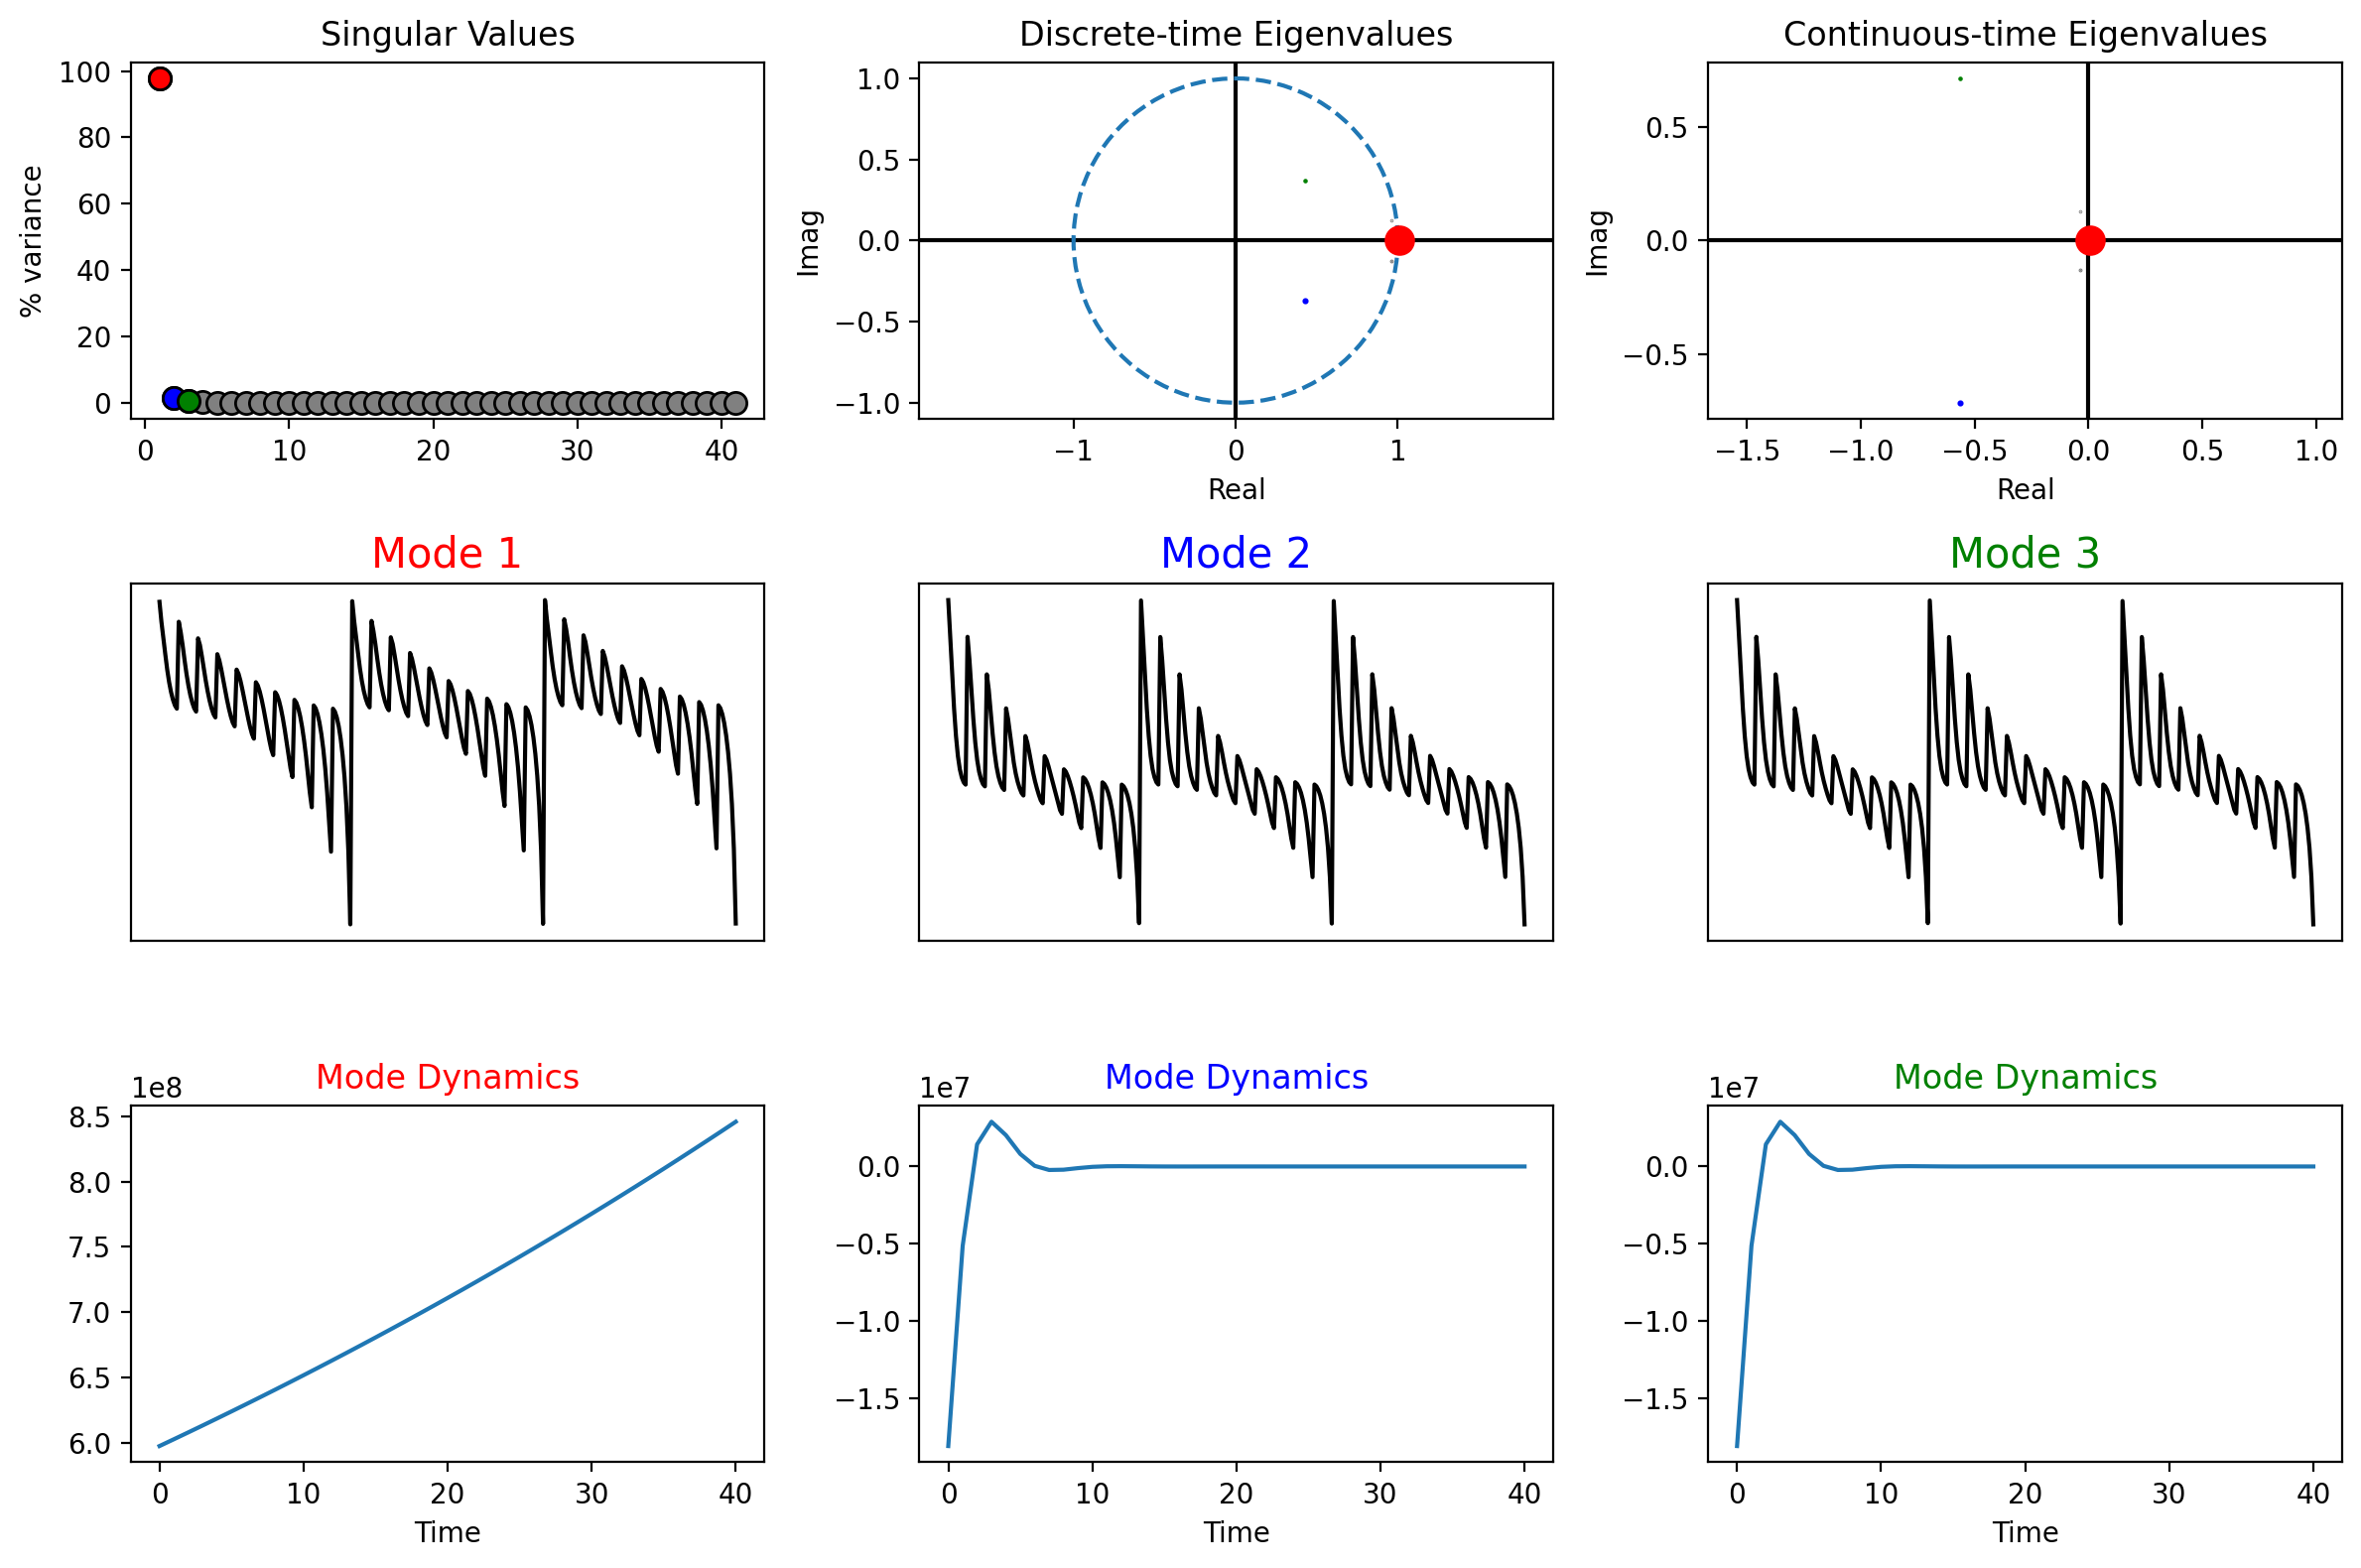

Relative Frobenius norm error: 0.62%
Mean absolute error: 189658.768 Pa
Reconstruction (forecast) time: 0.008 seconds


In [2]:
# Load monthly pressure snapshots from the .mat file
file_path='P_mon.mat'
name="P_mon"
pressure=mat73.loadmat(file_path)[name]   # shape: (300, 41)

# Initialize DMD with a chosen rank and fit to the data
pressure_model=pydmd.DMD(svd_rank=5)
pressure_model.fit(pressure)  # Fit the DMD model on the monthly data
plot_summary(pressure_model)  # Plot eigenvalues and mode contributions

# Set up for forecasting 40 future monthly snapshots
n_forecast = 40
pressure_pred = np.empty((pressure.shape[0], n_forecast))
x        = pressure[:, 0].reshape(-1,1)    # shape (300,1)

# --- start timer for reconstruction (forecast) ---
t0 = time.time()
# Roll forward one month at a time, storing each prediction
for k in range(n_forecast):
    pressure_pred[:, [k]] = x = pressure_model.predict(x) # Store prediction as a column

t1 = time.time()
# Prepend the initial snapshot for alignment: final shape = (300, 41)
pressure_pred= np.hstack((pressure[:, 0].reshape(-1,1),pressure_pred))

# Compute error metrics between true and predicted series
rel_error = (np.linalg.norm(pressure - pressure_pred, ord='fro') /
             np.linalg.norm(pressure, ord='fro') * 100)
mae = np.nanmean(np.abs(pressure - pressure_pred))

print(f"Relative Frobenius norm error: {rel_error:.2f}%")
print(f"Mean absolute error: {mae:.3f} Pa")
print(f"Reconstruction (forecast) time: {t1 - t0:.3f} seconds")

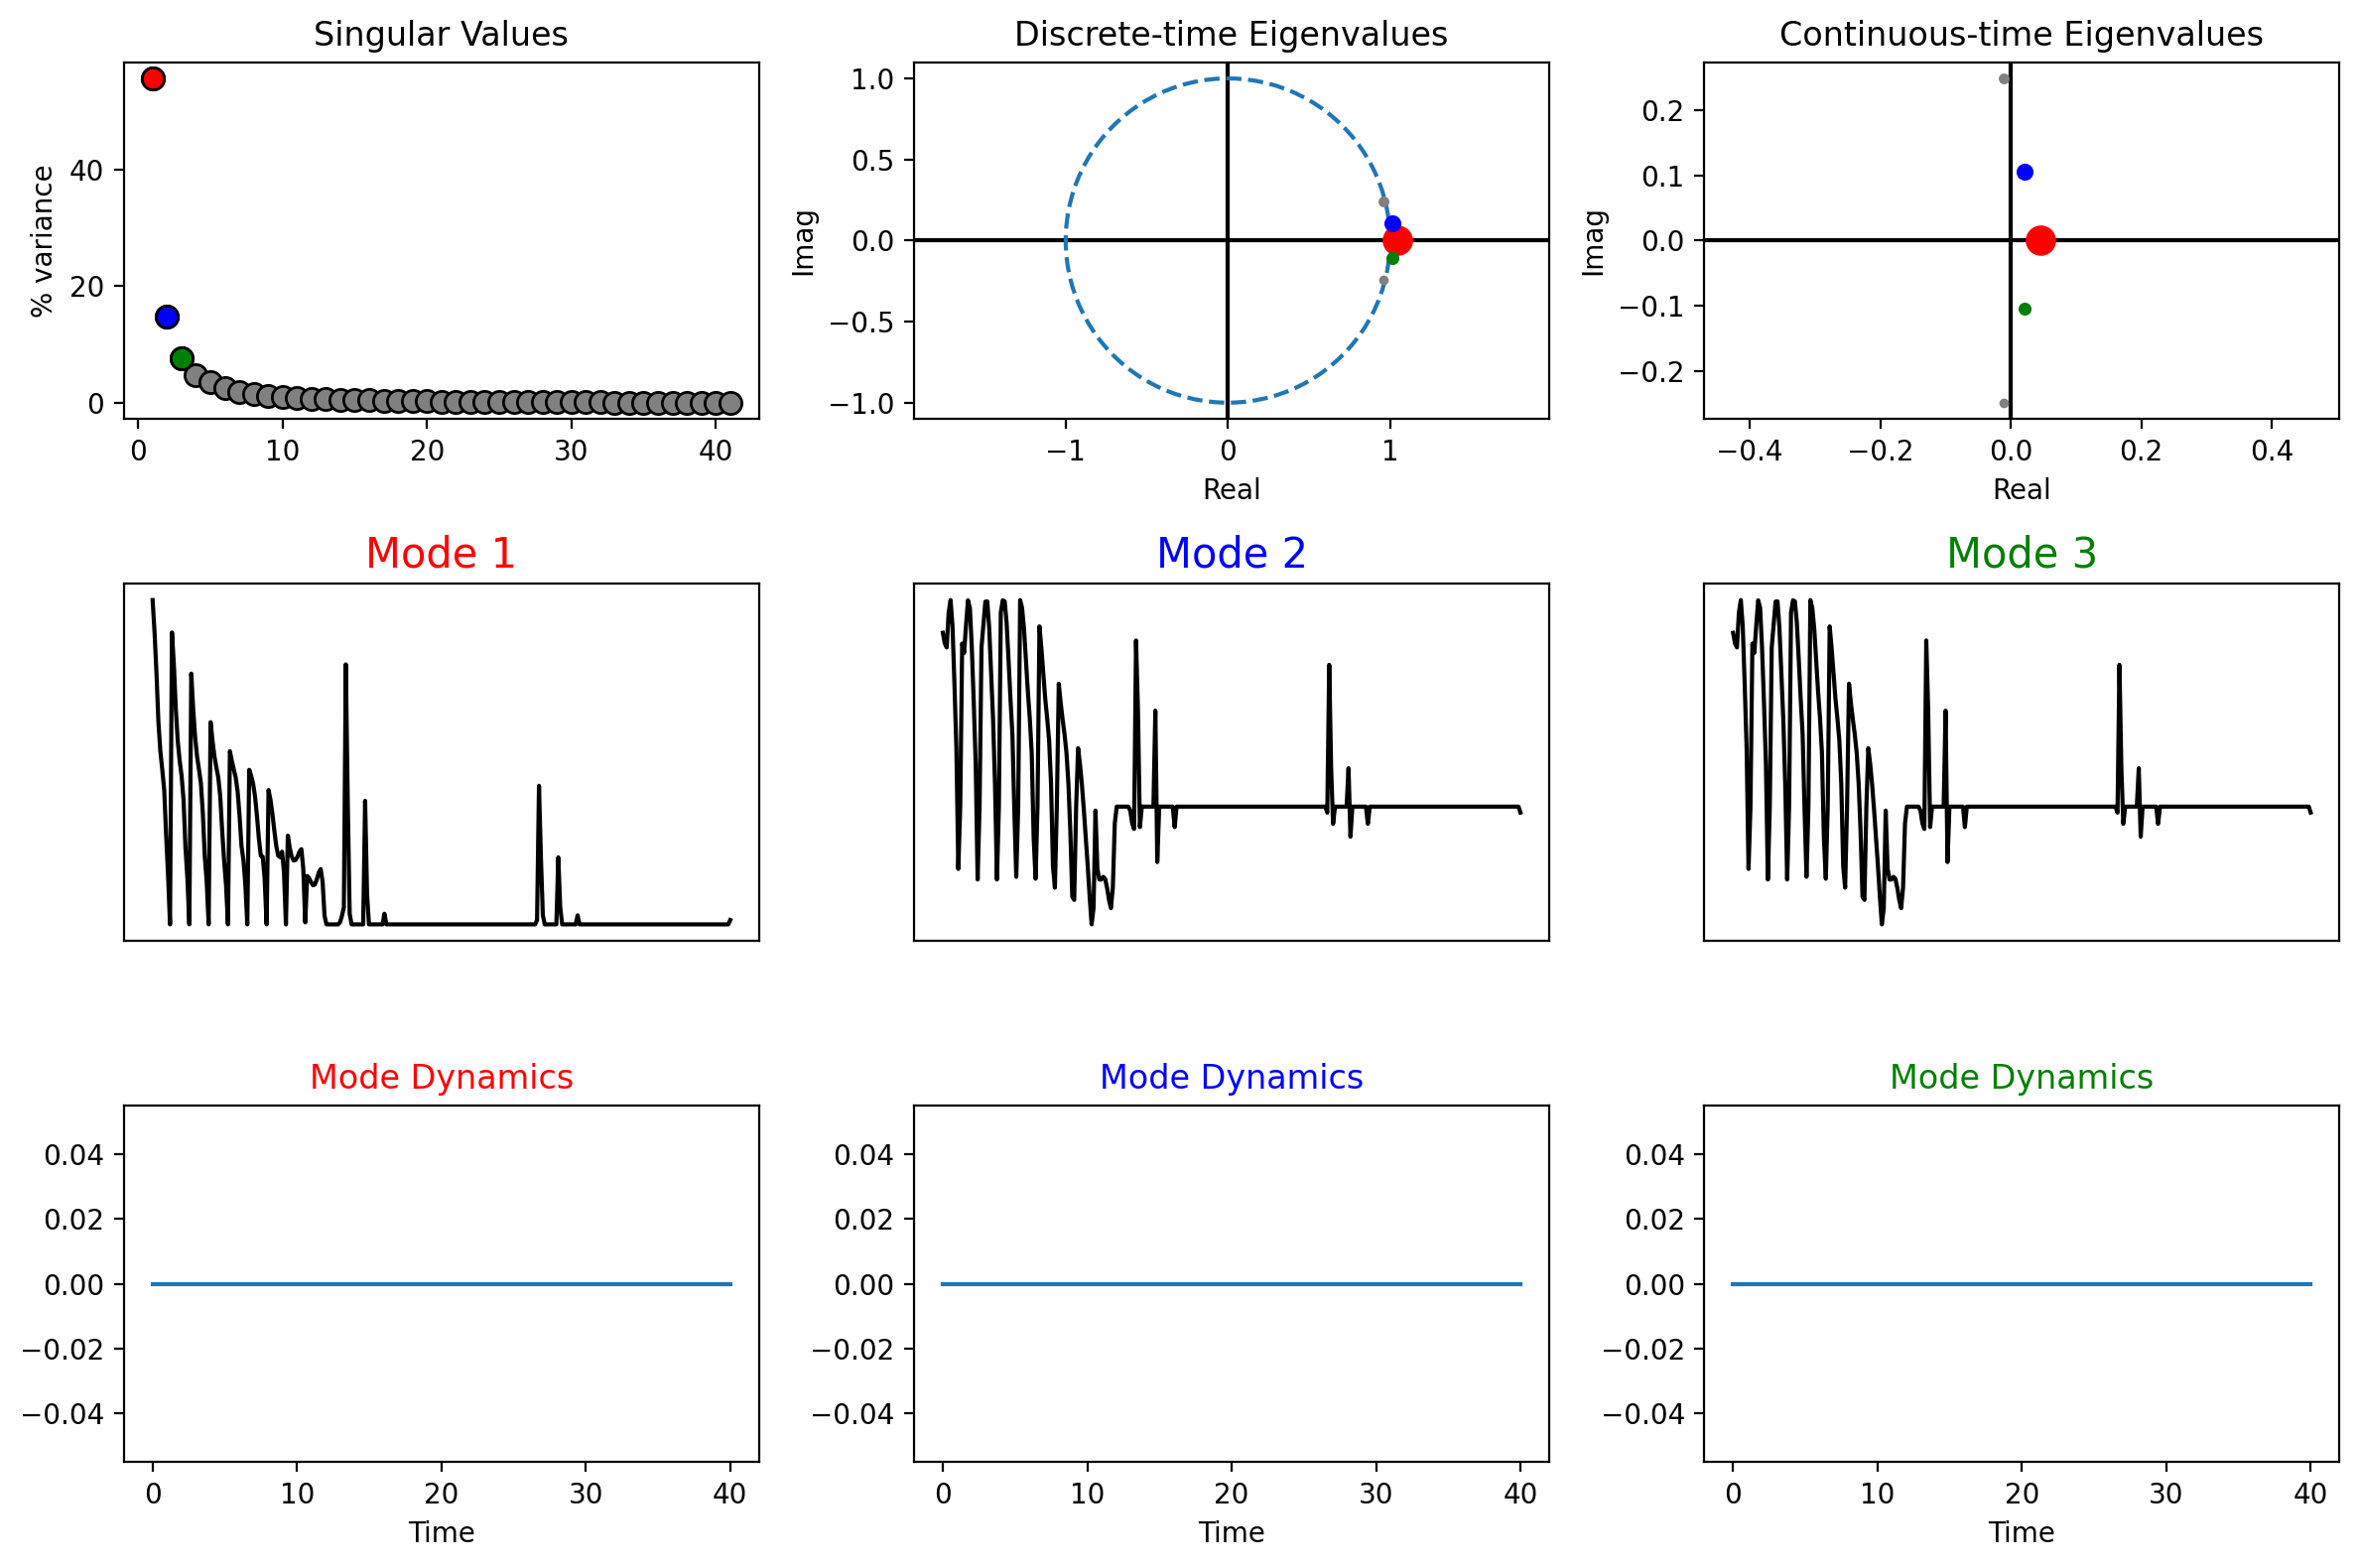

Mean absolute error: 0.053
Reconstruction (forecast) time: 0.004 seconds


In [3]:
# Load monthly gas saturation snapshots from the .mat file
file_path='G_mon.mat'
name="G_mon"
sgas=mat73.loadmat(file_path)[name]   # shape: (300, 41)

# Initialize DMD with a chosen rank and fit to the data
sgas_model=pydmd.DMD(svd_rank=5)
sgas_model.fit(sgas)  # Fit the DMD model on the monthly data
plot_summary(sgas_model)  # Plot eigenvalues and mode contributions

# Set up for forecasting 40 future monthly snapshots
n_forecast = 40
sgas_pred = np.empty((sgas.shape[0], n_forecast))
x        = sgas[:, 0].reshape(-1,1)    # shape (300,1)

# --- start timer for reconstruction (forecast) ---
t0 = time.time()
# Roll forward one month at a time, storing each prediction
for k in range(n_forecast):
    sgas_pred[:, [k]] = x = sgas_model.predict(x)

t1 = time.time()
# Prepend the initial snapshot for alignment: final shape = (300, 41)
sgas_pred= np.hstack((sgas[:, 0].reshape(-1,1),sgas_pred))

# Compute error metrics between true and predicted series
mae = np.nanmean(np.abs(sgas - sgas_pred))

print(f"Mean absolute error: {mae:.3f}")
print(f"Reconstruction (forecast) time: {t1 - t0:.3f} seconds")

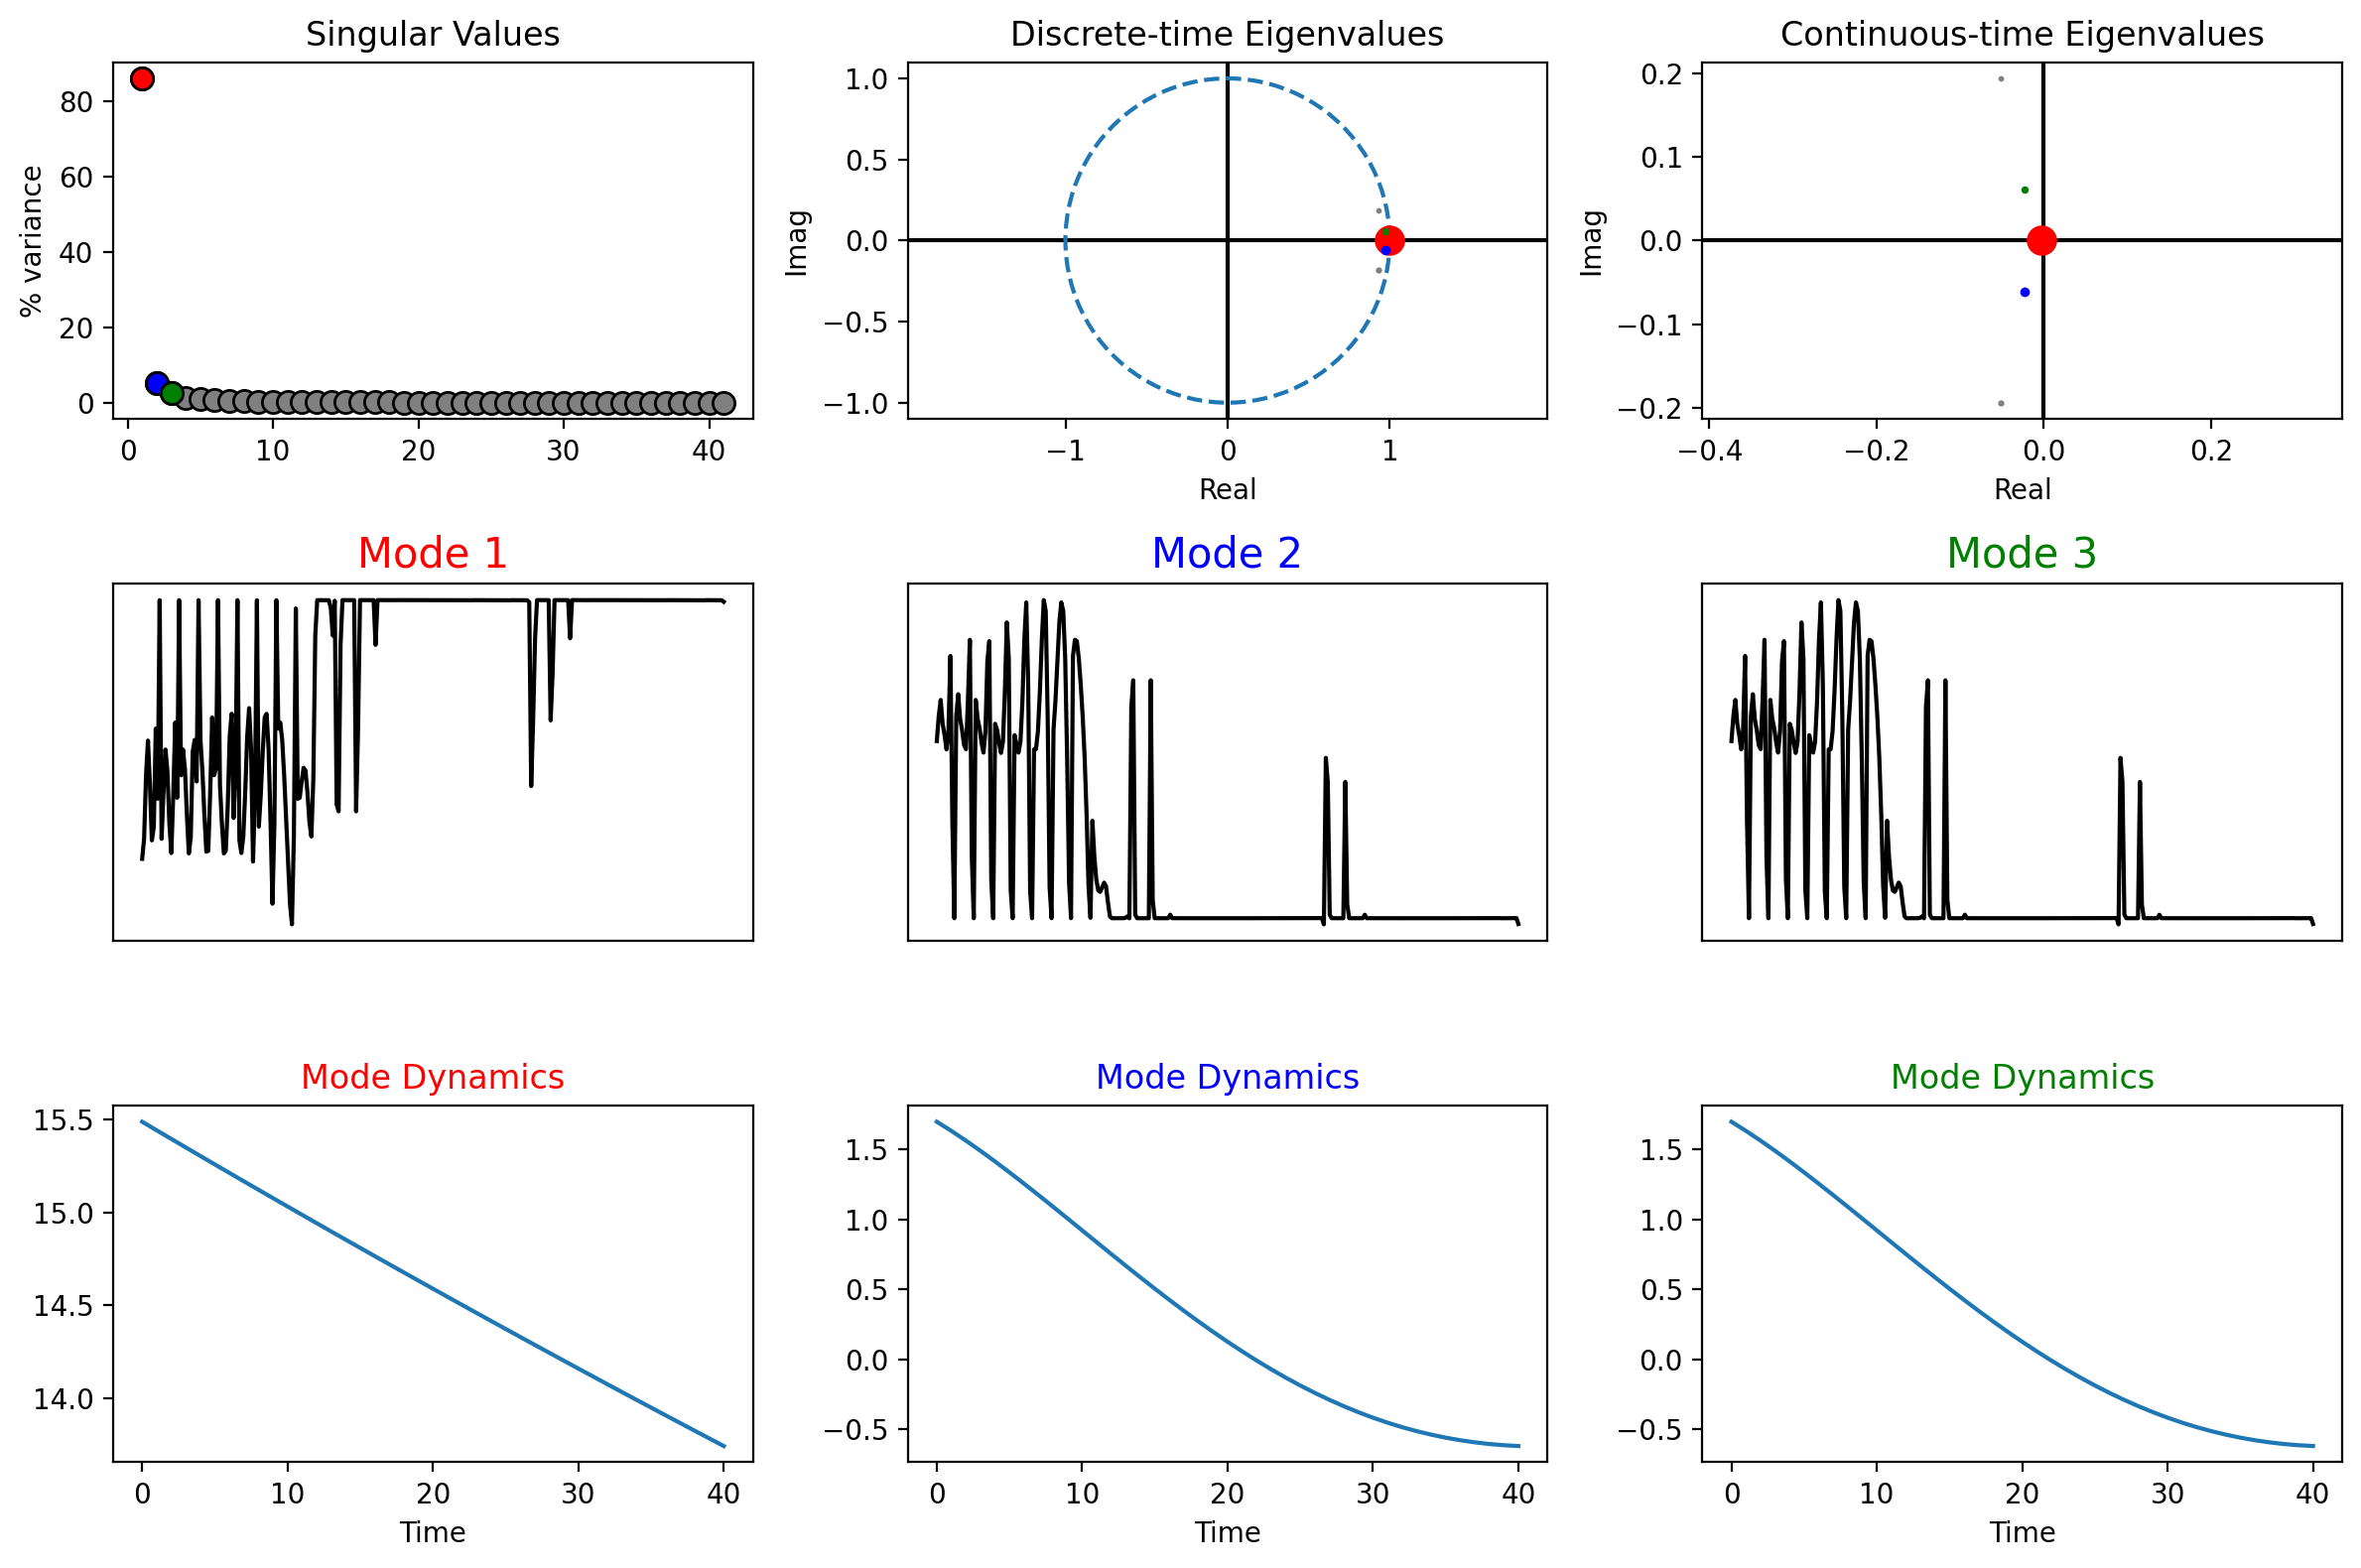

Mean absolute error: 0.005
Reconstruction (forecast) time: 0.004 seconds


In [4]:
# Load monthly oil saturation snapshots from the .mat file
file_path='O_mon.mat'
name="O_mon"
soil=mat73.loadmat(file_path)[name]   # shape: (300, 41)

# Initialize DMD with a chosen rank and fit to the data
soil_model=pydmd.DMD(svd_rank=5)
soil_model.fit(soil)  # Fit the DMD model on the monthly data
plot_summary(soil_model)  # Plot eigenvalues and mode contributions

# Set up for forecasting 40 future monthly snapshots
n_forecast = 40
soil_pred = np.empty((soil.shape[0], n_forecast))
x        = soil[:, 0].reshape(-1,1)    # shape (300,1)

# --- start timer for reconstruction (forecast) ---
t0 = time.time()
# Roll forward one month at a time, storing each prediction
for k in range(n_forecast):
    soil_pred[:, [k]] = x = soil_model.predict(x)

t1 = time.time()
# Prepend the initial snapshot for alignment: final shape = (300, 41)
soil_pred= np.hstack((soil[:, 0].reshape(-1,1), soil_pred))

# Compute error metrics between true and predicted series
mae = np.nanmean(np.abs(soil - soil_pred))

print(f"Mean absolute error: {mae:.3f}")
print(f"Reconstruction (forecast) time: {t1 - t0:.3f} seconds")